In [80]:
import numpy as np
import h5py 
from matplotlib import pyplot as plt
import pandas as pd

from scipy.integrate import trapezoid as sp_trapezoid


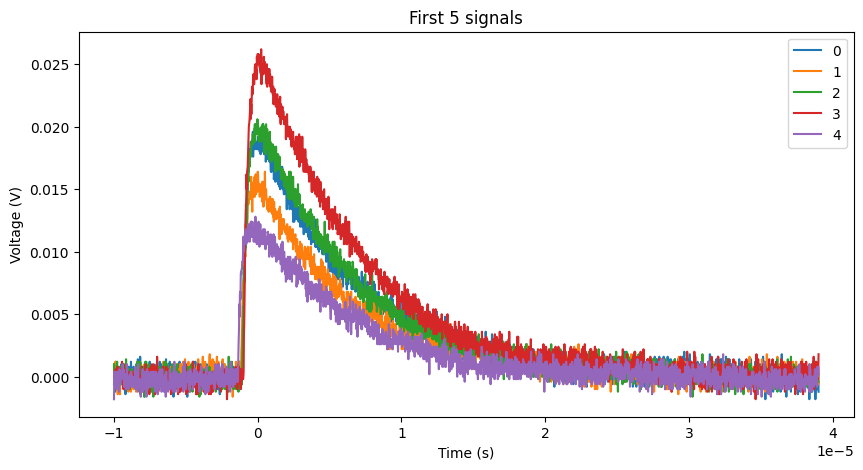

In [ ]:
def load_signals():
    signals_path = r'data\sipm_spectroscopy\signals_20250316-164356.h5'
    with h5py.File(signals_path, 'r') as f:
        signals = [f[key][:] for key in f.keys()]
        signals = [pd.DataFrame(signal, columns=['t', 'V']) for signal in signals]
        return signals
sigs = load_signals()

fig, ax = plt.subplots(1,1, figsize=(10,5))
for i, sig in enumerate(sigs[:5]):
    ax.plot(sig['t'], sig['V'], label = f'{i}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    ax.set_title('First 5 signals')
    ax.legend()
plt.tight_layout
plt.show()

In [82]:
# integrate the signal with respect to time, set a threshhold at 4.4mV
def calculate_integral(signal):
    signal['V'] = [0 if np.abs(x) < 2e-3 else x for x in signal['V']]
    integral = sp_trapezoid(signal['V'], signal['t'])
    return integral
integrals = [calculate_integral(signal) for signal in sigs]
integrals
    
    

[np.float64(1.4338e-07),
 np.float64(1.0979200000000002e-07),
 np.float64(1.4622400000000003e-07),
 np.float64(1.9240800000000006e-07),
 np.float64(8.424800000000001e-08),
 np.float64(7.236000000000001e-08),
 np.float64(1.6474800000000001e-07),
 np.float64(7.22788e-07),
 np.float64(8.2708e-08),
 np.float64(2.1616000000000002e-07),
 np.float64(8.577599999999999e-08),
 np.float64(7.666e-08),
 np.float64(2.3334e-07),
 np.float64(1.0556399999999999e-07),
 np.float64(8.225599999999999e-08),
 np.float64(2.4222000000000006e-07),
 np.float64(8.4e-08),
 np.float64(1.90364e-07),
 np.float64(7.688400000000002e-08),
 np.float64(8.414400000000002e-08),
 np.float64(1.1104000000000001e-07),
 np.float64(1.5498799999999998e-07),
 np.float64(7.4068e-08),
 np.float64(8.946800000000002e-08),
 np.float64(7.559600000000001e-08),
 np.float64(2.0444800000000003e-07),
 np.float64(7.483999999999999e-08),
 np.float64(1.93712e-07),
 np.float64(1.3009999999999998e-07),
 np.float64(8.228799999999999e-08),
 np.float

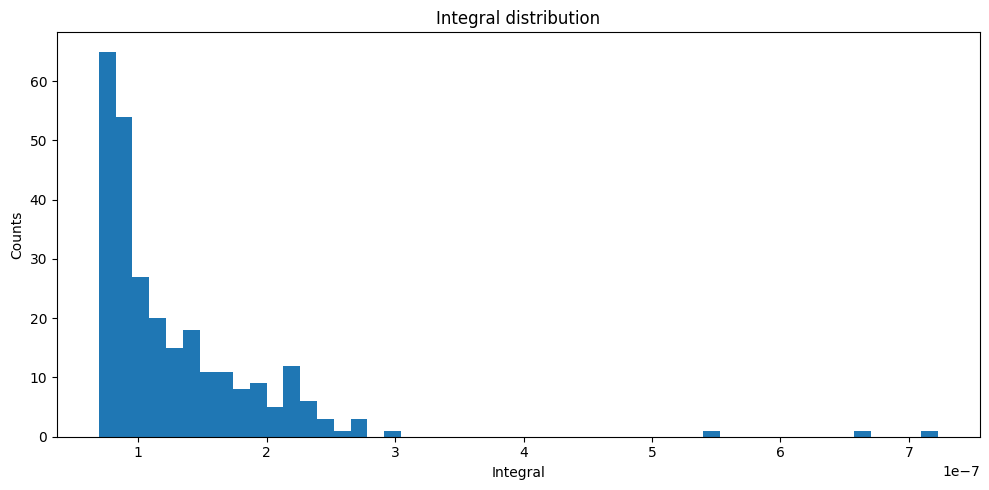

In [83]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(integrals, bins=50)
# set x range
# ax.set_xlim(0, 3e-7)
ax.set_xlabel('Integral')
ax.set_ylabel('Counts')
ax.set_title('Integral distribution')
plt.tight_layout()
plt.show()
